# BL40A2030 Wireless Communication Networks

## Week 5 - Assignment

### Author: Alex Beattie

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('bmh')
from scipy.spatial import distance
#Not to show warning messages (to keep the notebook clean)
import warnings

warnings.filterwarnings('ignore')

**1. (Scaling laws) Plot the throughput capacity for random networks with immobile nodes considering both the protocol and the physical model. Eq.(22) and (23) from [5].**

Text(0, 0.5, 'Throughput capacity')

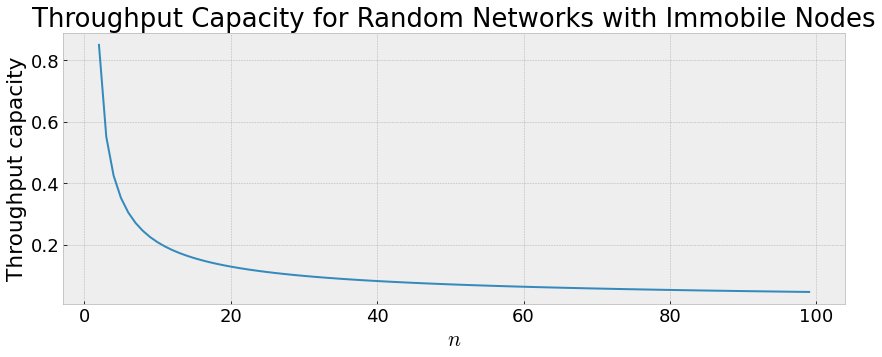

In [8]:

N = np.arange(0,100)
W = 1
plt.figure(figsize=(14,5))

prob = [W / (np.sqrt(n*np.log(n))) for n in N ]
plt.plot(N,prob )

plt.title("Throughput Capacity for Random Networks with Immobile Nodes")
plt.xlabel("$n$")
plt.ylabel("Throughput capacity")

(a) What does this result mean in terms of how much bits per second can flow in the network when the number of nodes increases?

This indicates that as the number of nodes increases the number of bits per second that can flow through the network is maximally
bounded by $O(\frac{1}{\sqrt{n}})$. This means that in these two random networks, since the node placement is unknown,
adding more nodes will lead to a decrease in the maximum theoretical throughput of the network.

(b) Cite two ways to improve the throughput capacity of wireless networks that is given in [5]. Make a brief comment with your own words about these two solutions (pro and con). 

Since the two networks are maximally bounded by $O(\frac{1}{\sqrt{n}})$, one way to increase the throughput of the network
is to increase the value of $W$ because that would offer improved speed. This is the same reason you cannot use big-O complexity
to determine the speed of an algorithm. For example a massively parallelized O(n^2) sorting algorithm on a super computer
would run much faster than an O(n log(n)) sorting algorithm on a single threaded computer from the early 2000's.

Another way to increase the capacity would be to set the positioning of the nodes. If the network designer was able to
specify the location of the nodes the maximum throughput of the network could be bounded by $O(\sqrt{n})$ in which
case increasing the number of nodes would actually increase the throughput of the network.


*Hint: The "big O" [notation](https://en.wikipedia.org/wiki/Big_O_notation) provides asymptotic boundaries of functions. In other words, what happens with the function when $n$ grows large (to infinity). It is not the function but lower and/or upper bounds. For example, the plot I wish tells that the throughput asymptotically behaves with the number of nodes in the network. In this case, the throughput capacity scales down with this number following the equations. In this sense, $W$ is a constant so one can set $W=1$ (bits/s). Note that the equations are the same, telling that they have indeed the same scaling in throughput capacity. In other words, both models have the same fundamental limit for random networks (what is not the case for arbitrary -- i.e. I decide where to put the nodes -- networks).*

**2. (Interference empirical distribution) Let us analyze the effect of the newtork size in the interference distribution for the same network density (expected number of interferers per unit of area). Follow the implementation of the "path-loss model 2" given in the tutorial. Consider the pathloss exponent $\alpha=3$, the density of $0.1$ node$/m^2$ and a square network of $L \times L$. Plot the empirical distribution for:** 

(a) $L = 5$ 

(b) $L = 10$

(c) $L = 20$

(d) $L = 100$

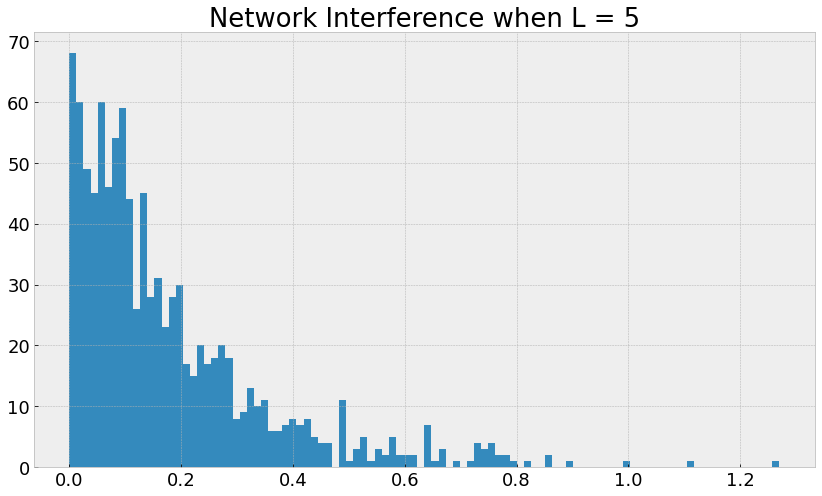

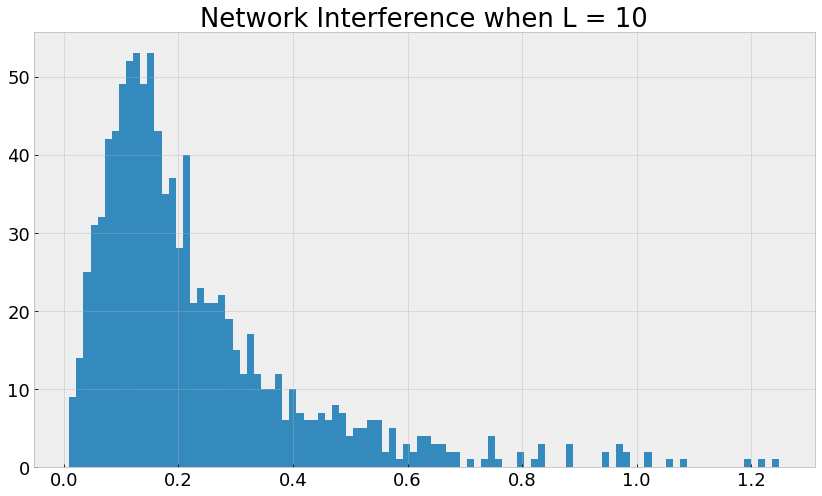

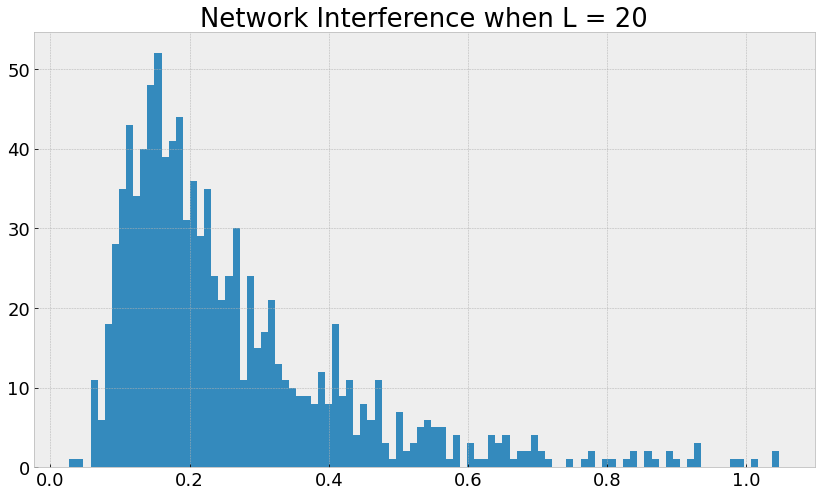

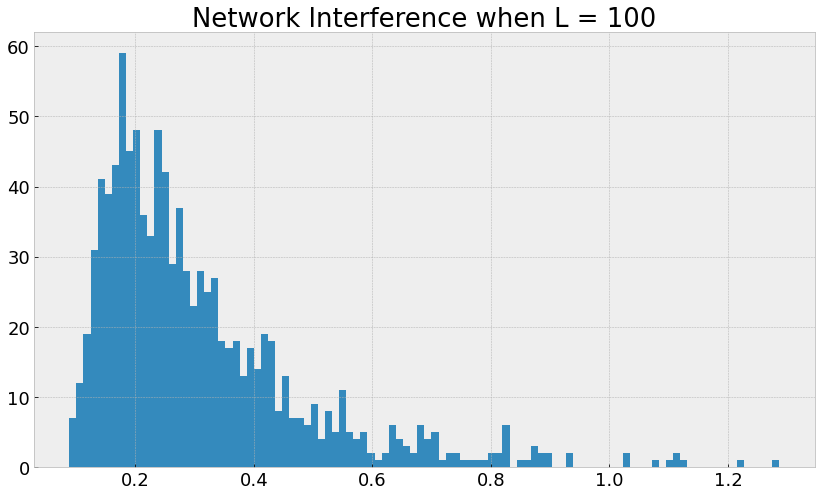

In [9]:
#Number of trials
trials = 1000
#Network size (square)
L_range = [5,10,20,100]
for L in L_range:
    mean_poisson = 0.1 * L ** 2
    #Path-loss exponent
    alpha = 3
    interference = np.zeros(trials)
    for j in range(trials):
        #Number of nodes
        n = np.random.poisson(mean_poisson)
        #
        #Uniform distribution in x
        position_x_realization = np.random.uniform(-L/2,L/2,n)

        #Uniform distribution in y
        position_y_realization = np.random.uniform(-L/2,L/2,n)
        ##
        #Manipulating arrays to compute distances
        position_x_realization_t = np.transpose(position_x_realization)
        position_y_realization_t = np.transpose(position_y_realization)
        position_final = []
        position_final = [[position_x_realization_t[i], position_y_realization_t[i]] for i in range(n)]
        #position_final
        ###############
        #The distance to the rx1 (0,0)
        ###
        distance_rx = []
        distance_rx = [distance.euclidean(position_final[i],[0,0]) for i in range(n)]
        interference_i = []
        interference_i = [(1+distance_rx[i])**(-alpha) for i in range(n)]
        interference[j] = np.sum(interference_i)

    ###Plot
    plt.rcParams.update({'font.size': 18})
    plt.figure(figsize=(14,8))
    plt.hist(interference, bins = 100)
    plt.title(f"Network Interference when L = {L}")
    plt.show()

(e) Do you see any difference? Why?

There is a difference because the least interference occurs when L=5 and the distribution is shifted the furthest to the left.
As L increases there is progressively more interference as the distribution shifts to the right. When comparing the graphs
it is important to look at the scales for the axes as they are not always the same because of matplotlib. Since the network
density is the same, the interference could be caused by the larger network size causing more neighboring nodes to interfere.
In a larger network, there are more neighboring nodes because the topology is larger so this will cause more interference.


*Hint: To keep the same density: mean_poisson = density $\times L^2$*



**3. (Outage probability) Follow the tutorial to investigate the effect of the SIR threshold $\beta$ in the outage probability, defined as (1 - success probability).**

(a) Plot the outage probability as a function of $\beta>1$ for: d=1, alpha=4, L=10, mean_poisson= 10, trials=10000. Plot $\beta$ from 1 to 15.

In [10]:
def suc_prob(d,beta,alpha,L,mean_poisson,trials):
    interference = np.zeros(trials)
    success = 0
    for j in range(trials):
        #Number of nodes
        n = np.random.poisson(mean_poisson)
        #
        #Uniform distribution in x
        position_x_realization = np.random.uniform(-L/2,L/2,n)

        #Uniform distribution in y
        position_y_realization = np.random.uniform(-L/2,L/2,n)
        ##
        #Manipulating arrays to compute distances
        position_x_realization_t = np.transpose(position_x_realization)
        position_y_realization_t = np.transpose(position_y_realization)
        position_final = []
        position_final = [[position_x_realization_t[i], position_y_realization_t[i]] for i in range(n)]
        #position_final
        ###############
        #The distance to the rx1 (0,0)
        ###
        distance_rx = []
        distance_rx = [distance.euclidean(position_final[i],[0,0]) for i in range(n)]
        interference_i = []
        interference_i = [distance_rx[i]**(-alpha) for i in range(n)]
        if np.sum(interference_i) * beta < d**(-alpha):
            success = success + 1
    return success/trials


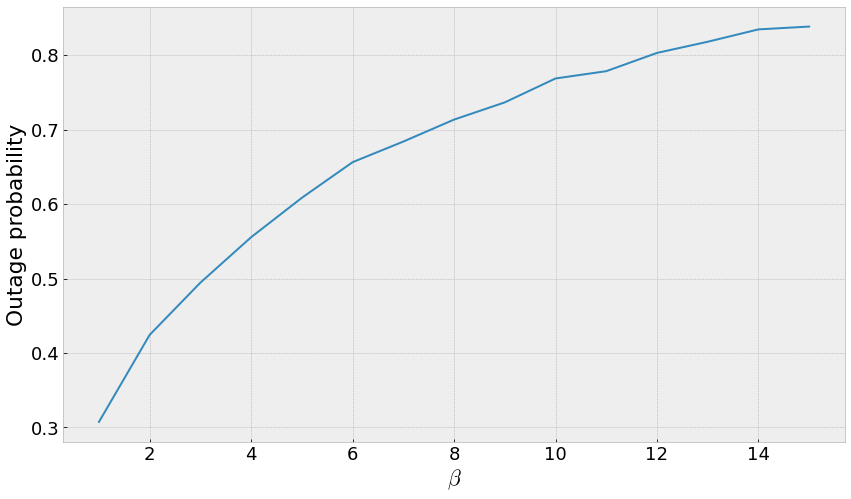

In [7]:
# Density of interferers as mean_poisson / network area
beta = range(1,16)
###Path-loss
n_trials = 10000

#alpha=4
suc_a4 = [suc_prob(d=1,beta=i,alpha=4,L=10,mean_poisson= 10,trials =n_trials) for i in beta]


###

plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(14,8))

plt.plot(beta, np.ones(15) - suc_a4)

plt.xlabel("$\\beta$")
plt.ylabel("Outage probability")
plt.show()

(b) Consider that the threshold $\beta$ is related to the channel capacity $\log_2(1+\beta)$ by treating the "interference as noise". This value indicates the maximum achieved spectral efficiency by the link in bits/s/Hz. Plot $\log_2(1+\beta)$ as a function of $\beta$, also from 1 to 15.

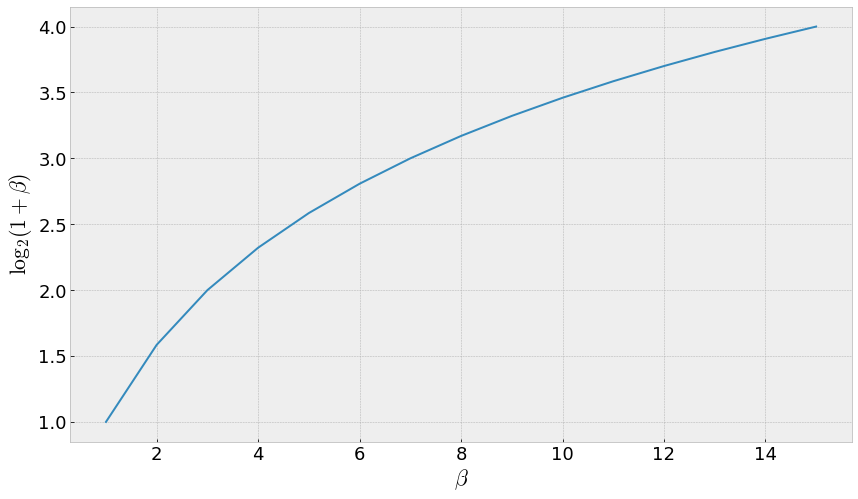

In [8]:
# Density of interferers as mean_poisson / network area
beta = range(1,16)
log_beta = [ np.log2(1+i) for i in beta]
###Path-loss
n_trials = 10000


###

plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(14,8))

plt.plot(beta, log_beta)

plt.xlabel("$\\beta$")
plt.ylabel("$\log_2({1 + \\beta})$")
plt.show()

(c) Discuss the trade-off involved in the outage probability and the spectral efficiency that is controlled by the threshold $\beta$.

Spectral efficiency and outage probability increase along the same relative curve as $\beta$ increases. What this means
is that increasing the spectral efficiency will also increase the outage probability and vice-versa. So it is important
to strike a balance between outage probability and spectral efficiency dictated by the network requirements
 when determining $\beta$.

